In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Import required library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Model
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from keras.optimizers import Adam
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.utils import pad_sequences
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping

# Read dataset and do pre-processing

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/spam.csv',delimiter=',',encoding='latin-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'],axis=1,inplace=True)
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
X = df.v2
Y = df.v1
le = LabelEncoder()
Y = le.fit_transform(Y)
Y = Y.reshape(-1,1)
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.25)
max_words = 1000
max_len = 150
tok = Tokenizer(num_words=max_words)
tok.fit_on_texts(X_train)
sequences = tok.texts_to_sequences(X_train)
sequences_matrix = pad_sequences(sequences,maxlen=max_len)

# Create Model

In [ ]:
inputs = Input(shape=[max_len])
layer = Embedding(max_words,50,input_length=max_len)(inputs)

# Add Layers (LSTM, Dense-(Hidden Layers), Output)

In [ ]:
layer = LSTM(128)(layer)
layer = Dense(128)(layer)
layer = Activation('relu')(layer)
layer = Dropout(0.5)(layer)
layer = Dense(1.5)(layer)
layer = Activation('sigmoid')(layer)
model = Model(inputs=inputs,outputs=layer)

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150)]             0         
                                                                 
 embedding (Embedding)       (None, 150, 50)           50000     
                                                                 
 lstm (LSTM)                 (None, 128)               91648     
                                                                 
 dense (Dense)               (None, 128)               16512     
                                                                 
 activation (Activation)     (None, 128)               0         
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 129   

# Compile the Model

In [ ]:
model.compile(loss='binary_crossentropy',optimizer=Adam(),metrics=['accuracy'])

# Fit the Model

In [ ]:
history = model.fit(sequences_matrix,Y_train,batch_size=20,epochs=15,validation_split=0.2)

Epoch 1/15
168/168 [==============================] - 38s 205ms/step - loss: 0.1636 - accuracy: 0.9500 - val_loss: 0.0538 - val_accuracy: 0.9844
Epoch 2/15
168/168 [==============================] - 40s 235ms/step - loss: 0.0449 - accuracy: 0.9874 - val_loss: 0.0331 - val_accuracy: 0.9916
Epoch 3/15
168/168 [==============================] - 32s 190ms/step - loss: 0.0263 - accuracy: 0.9907 - val_loss: 0.0348 - val_accuracy: 0.9916
Epoch 4/15
168/168 [==============================] - 34s 201ms/step - loss: 0.0144 - accuracy: 0.9949 - val_loss: 0.0358 - val_accuracy: 0.9928
Epoch 5/15
168/168 [==============================] - 37s 219ms/step - loss: 0.0134 - accuracy: 0.9964 - val_loss: 0.0414 - val_accuracy: 0.9880
Epoch 6/15
168/168 [==============================] - 34s 201ms/step - loss: 0.0083 - accuracy: 0.9982 - val_loss: 0.0574 - val_accuracy: 0.9833
Epoch 7/15
168/168 [==============================] - 32s 188ms/step - loss: 0.0042 - accuracy: 0.9994 - val_loss: 0.0518 - val_ac

In [ ]:
metrics = pd.DataFrame(history.history)
metrics.rename(columns = {'loss': 'Training_Loss', 'accuracy': 'Training_Accuracy', 'val_loss': 'Validation_Loss', 'val_accuracy': 'Validation_Accuracy'}, inplace = True)
def plot_graphs1(var1, var2, string):
  metrics[[var1, var2]].plot()
  plt.title('Training and Validation ' + string)
  plt.xlabel ('Number of epochs')
  plt.ylabel(string)
  plt.legend([var1, var2])


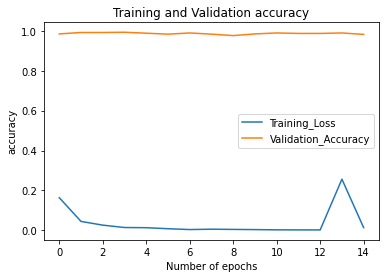

In [ ]:
plot_graphs1('Training_Loss', 'Validation_Accuracy', 'accuracy')

# Save The Model

In [ ]:
model.save('Spam_sms_classifier.h5')


# Test the Model

In [ ]:
test_sequences = tok.texts_to_sequences(X_test)
test_sequences_matrix = pad_sequences(test_sequences,maxlen=max_len)


In [ ]:
accuracy1 = model.evaluate(test_sequences_matrix,Y_test)

44/44 [==============================] - 6s 145ms/step - loss: 0.1115 - accuracy: 0.9763


In [ ]:
print(' Accuracy: {:0.15f}'.format(accuracy1[0],accuracy1[1]))


 Accuracy: 0.111498445272446
